<a href="https://colab.research.google.com/github/Willi-blip/numpy1/blob/main/Projecto_GP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Celda 1: Instalar dependencias
!pip install tensorflow opencv-python matplotlib tensorflowjs

In [ ]:
# Celda 2: Importar librer√≠as
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.19.0


Verificando estructura de carpetas...
¬øExiste dataset_dir? True
¬øExiste gatos_dir? True
¬øExiste perros_dir? True

Im√°genes encontradas:
Gatos: 11 im√°genes
Perros: 12 im√°genes

Archivos en gatos: ['g9.jpeg', 'g10.jpeg', 'g11.jpeg', 'g5.jpeg', 'g3.jpg', 'g7.jpeg', 'g1.jpg', 'g4.jpeg', 'g8.jpeg', 'g2.png', 'g6.jpeg']
Archivos en perros: ['p5.jpeg', 'p12.jpeg', 'p10.jpeg', 'p4.jpeg', 'p3.jpeg', 'toby.jpg', 'p11.jpeg', 'p9.jpeg', 'p1.jpeg', 'p8.jpeg', 'p2.jpeg', 'p6.jpeg']


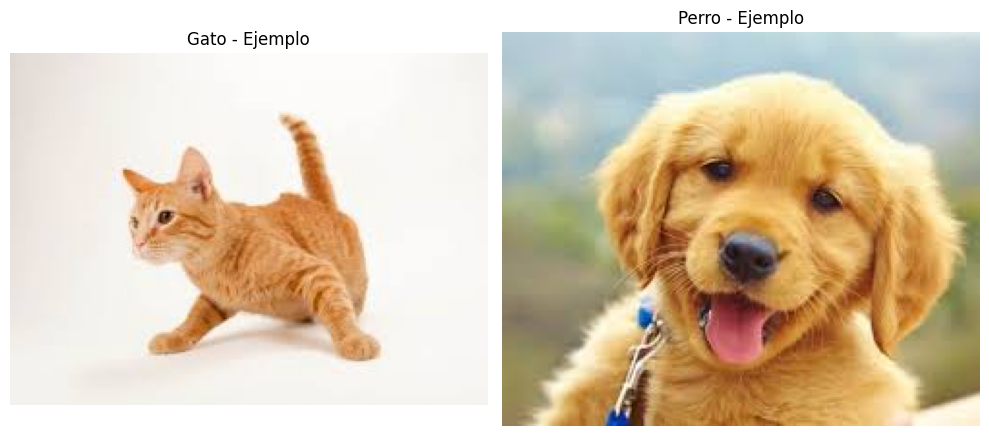

In [ ]:
# Celda 3: Configurar paths y verificar im√°genes (CORREGIDO)
# Configurar las rutas seg√∫n tu estructura - SIN Google Drive
dataset_dir = '/content/dataset'  # Esta es la carpeta que ya creaste
gatos_dir = os.path.join(dataset_dir, 'gatos')
perros_dir = os.path.join(dataset_dir, 'perros')

# Verificar que las carpetas existen
print("Verificando estructura de carpetas...")
print(f"¬øExiste dataset_dir? {os.path.exists(dataset_dir)}")
print(f"¬øExiste gatos_dir? {os.path.exists(gatos_dir)}")
print(f"¬øExiste perros_dir? {os.path.exists(perros_dir)}")

# Contar im√°genes
if os.path.exists(gatos_dir):
    gatos_imgs = [f for f in os.listdir(gatos_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
else:
    gatos_imgs = []

if os.path.exists(perros_dir):
    perros_imgs = [f for f in os.listdir(perros_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
else:
    perros_imgs = []

print("\nIm√°genes encontradas:")
print(f"Gatos: {len(gatos_imgs)} im√°genes")
print(f"Perros: {len(perros_imgs)} im√°genes")

# Mostrar nombres de archivos para debugging
if gatos_imgs:
    print(f"\nArchivos en gatos: {gatos_imgs}")
if perros_imgs:
    print(f"Archivos en perros: {perros_imgs}")

# Mostrar algunas im√°genes de ejemplo si existen
if gatos_imgs and perros_imgs:
    plt.figure(figsize=(10, 5))

    # Mostrar un gato
    plt.subplot(1, 2, 1)
    gato_img = cv2.imread(os.path.join(gatos_dir, gatos_imgs[0]))
    if gato_img is not None:
        gato_img = cv2.cvtColor(gato_img, cv2.COLOR_BGR2RGB)
        plt.imshow(gato_img)
        plt.title('Gato - Ejemplo')
        plt.axis('off')
    else:
        plt.text(0.5, 0.5, 'Error cargando imagen', ha='center')
        plt.title('Error')

    # Mostrar un perro
    plt.subplot(1, 2, 2)
    perro_img = cv2.imread(os.path.join(perros_dir, perros_imgs[0]))
    if perro_img is not None:
        perro_img = cv2.cvtColor(perro_img, cv2.COLOR_BGR2RGB)
        plt.imshow(perro_img)
        plt.title('Perro - Ejemplo')
        plt.axis('off')
    else:
        plt.text(0.5, 0.5, 'Error cargando imagen', ha='center')
        plt.title('Error')

    plt.tight_layout()
    plt.show()
else:
    print("\nERROR: No se encontraron im√°genes o carpetas.")
    print("Por favor verifica:")
    print("1. Que la carpeta 'dataset' existe en /content/")
    print("2. Que dentro de 'dataset' hay carpetas 'gatos' y 'perros'")
    print("3. Que las carpetas contienen im√°genes en formatos .jpg, .jpeg o .png")

In [ ]:
# Celda 4: Preprocesamiento de im√°genes (CORREGIDO)
IMG_SIZE = 150  # Tama√±o al que redimensionaremos las im√°genes

def cargar_imagenes(data_dir, etiqueta):
    imagenes = []
    etiquetas = []

    if not os.path.exists(data_dir):
        print(f"Directorio no encontrado: {data_dir}")
        return np.array(imagenes), np.array(etiquetas)

    # Solo procesar archivos de imagen
    archivos_imagen = [f for f in os.listdir(data_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

    if not archivos_imagen:
        print(f"No se encontraron im√°genes en: {data_dir}")
        return np.array(imagenes), np.array(etiquetas)

    for img_name in archivos_imagen:
        try:
            img_path = os.path.join(data_dir, img_name)
            img_arr = cv2.imread(img_path)
            if img_arr is None:
                print(f"No se pudo cargar (formato no compatible?): {img_path}")
                continue
            img_arr = cv2.resize(img_arr, (IMG_SIZE, IMG_SIZE))
            img_arr = cv2.cvtColor(img_arr, cv2.COLOR_BGR2RGB)  # Convertir a RGB
            imagenes.append(img_arr)
            etiquetas.append(etiqueta)
            print(f"‚úì {img_name} cargado correctamente")
        except Exception as e:
            print(f"Error procesando imagen {img_path}: {e}")

    return np.array(imagenes), np.array(etiquetas)

print("Cargando im√°genes de gatos...")
X_gatos, y_gatos = cargar_imagenes(gatos_dir, 0)  # 0 para gatos

print("\nCargando im√°genes de perros...")
X_perros, y_perros = cargar_imagenes(perros_dir, 1)  # 1 para perros

# Verificar que tenemos im√°genes
if len(X_gatos) == 0 or len(X_perros) == 0:
    print("\nERROR: No se pudieron cargar im√°genes. Verifica:")
    print("1. Los formatos de imagen (usar .jpg, .png)")
    print("2. Que las im√°genes no est√©n corruptas")
    print("3. Que los nombres de archivo no tengan caracteres especiales")
else:
    # Combinar datos
    X = np.concatenate((X_gatos, X_perros))
    y = np.concatenate((y_gatos, y_perros))

    # Mezclar los datos
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)
    X = X[indices]
    y = y[indices]

    # Normalizar los datos
    X = X / 255.0

    print(f"\nResumen del dataset:")
    print(f"Total de im√°genes: {X.shape[0]}")
    print(f"Forma de las im√°genes: {X.shape[1:]}")
    print(f"Gatos: {len(X_gatos)}, Perros: {len(X_perros)}")

Cargando im√°genes de gatos...
‚úì g9.jpeg cargado correctamente
‚úì g10.jpeg cargado correctamente
‚úì g11.jpeg cargado correctamente
‚úì g5.jpeg cargado correctamente
‚úì g3.jpg cargado correctamente
‚úì g7.jpeg cargado correctamente
‚úì g1.jpg cargado correctamente
‚úì g4.jpeg cargado correctamente
‚úì g8.jpeg cargado correctamente
‚úì g2.png cargado correctamente
‚úì g6.jpeg cargado correctamente

Cargando im√°genes de perros...
‚úì p5.jpeg cargado correctamente
‚úì p12.jpeg cargado correctamente
‚úì p10.jpeg cargado correctamente
‚úì p4.jpeg cargado correctamente
‚úì p3.jpeg cargado correctamente
‚úì toby.jpg cargado correctamente
‚úì p11.jpeg cargado correctamente
‚úì p9.jpeg cargado correctamente
‚úì p1.jpeg cargado correctamente
‚úì p8.jpeg cargado correctamente
‚úì p2.jpeg cargado correctamente
‚úì p6.jpeg cargado correctamente

Resumen del dataset:
Total de im√°genes: 23
Forma de las im√°genes: (150, 150, 3)
Gatos: 11, Perros: 12


Im√°genes de entrenamiento: 18
Im√°genes de prueba: 5

Ejemplo de aumento de datos:


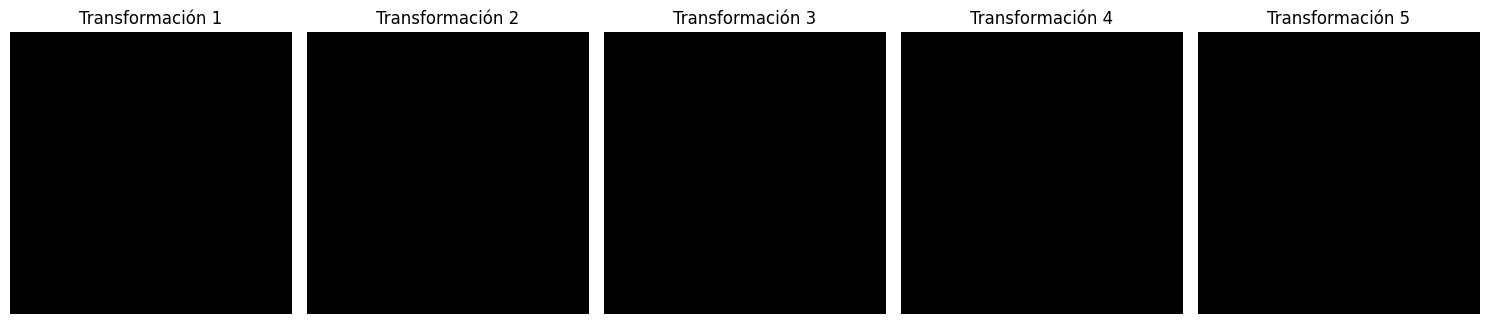

In [ ]:
# Celda 5: Dividir datos y aumentar datos
if 'X' in locals() and X.shape[0] > 0:
    # Para pocos datos, usamos validaci√≥n cruzada o m√°s datos de entrenamiento
    if X.shape[0] < 20:
        # Si tenemos muy pocos datos, usar solo 10% para prueba
        test_size = 0.1
        print("Pocos datos detectados. Usando 90% entrenamiento, 10% prueba")
    else:
        test_size = 0.2

    X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(
        X, y, test_size=test_size, random_state=42, stratify=y
    )

    print(f"Im√°genes de entrenamiento: {X_entrenamiento.shape[0]}")
    print(f"Im√°genes de prueba: {X_prueba.shape[0]}")

    # Aumento de datos - muy importante con pocas im√°genes
    aumento_datos = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.3,
        height_shift_range=0.3,
        horizontal_flip=True,
        vertical_flip=True,
        zoom_range=0.3,
        shear_range=0.3,
        brightness_range=[0.7, 1.3],
        fill_mode='nearest'
    )

    # Mostrar ejemplo de aumento de datos
    print("\nEjemplo de aumento de datos:")
    plt.figure(figsize=(15, 5))
    for i in range(5):
        plt.subplot(1, 5, i + 1)
        img_aumentada = aumento_datos.random_transform(X_entrenamiento[0])
        plt.imshow(img_aumentada)
        plt.title(f'Transformaci√≥n {i+1}')
        plt.axis('off')
    plt.tight_layout()
    plt.show()

else:
    print("No hay datos para entrenar. Verifica la carga de im√°genes.")

In [ ]:
# Celda 6: Crear el modelo (optimizado para pocos datos)
if 'X_entrenamiento' in locals():
    # Usar modelo m√°s simple para pocos datos
    modelo = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),

        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(64, activation='relu'),
        layers.Dense(1, activation='sigmoid')  # Salida binaria: perro o gato
    ])

    modelo.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    print("Resumen del modelo:")
    modelo.summary()
else:
    print("No se puede crear el modelo. Verifica los datos.")

Resumen del modelo:


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Layer (type)                    ‚îÉ Output Shape           ‚îÉ       Param # ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ conv2d (Conv2D)                 ‚îÇ (None, 148, 148, 32)   ‚îÇ           896 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ max_pooling2d (MaxPooling2D)    ‚îÇ (None, 74, 74, 32)     ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ conv2d_1 (Conv2D)               ‚îÇ (None, 72, 72, 64)     ‚îÇ        18,496 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ max_pooling2d_1 (MaxPooling2D)  ‚îÇ (None, 36, 36, 64)     ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ conv2d_2 (Conv2D)               ‚îÇ (None, 34, 34, 64)     ‚îÇ        36,928 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ max_pooling2d_2 (MaxPooling2D)  ‚îÇ (None, 17, 17, 64)     ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ flatten (Flatten)               ‚îÇ (None, 18496)          ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dropout (Dropout)               ‚îÇ (None, 18496)          ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense (Dense)                   ‚îÇ (None, 64)             ‚îÇ     1,183,808 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_1 (Dense)                 ‚îÇ (None, 1)              ‚îÇ            65 ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

 Total params: 1,240,193 (4.73 MB)

 Trainable params: 1,240,193 (4.73 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Celda 7: Entrenar el modelo (adaptado para pocos datos)
if 'X_entrenamiento' in locals() and X_entrenamiento.shape[0] > 0:
    # Callbacks para mejorar el entrenamiento con pocos datos
    parada_temprana = tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=15,
        restore_best_weights=True,
        verbose=1
    )

    reduccion_lr = tf.keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.2,
        patience=8,
        min_lr=0.00001,
        verbose=1
    )

    print("Comenzando entrenamiento...")
    print(f"Usando {X_entrenamiento.shape[0]} im√°genes para entrenamiento")

    # Entrenar con aumento de datos
    historial = modelo.fit(
        aumento_datos.flow(X_entrenamiento, y_entrenamiento, batch_size=4),
        steps_per_epoch=max(5, len(X_entrenamiento) // 2),  # Menos steps para pocos datos
        epochs=100,  # M√°s √©pocas pero con early stopping
        validation_data=(X_prueba, y_prueba) if X_prueba.shape[0] > 0 else None,
        callbacks=[parada_temprana, reduccion_lr],
        verbose=1
    )

    print("¬°Entrenamiento completado!")

else:
    print("No hay datos de entrenamiento.")

Comenzando entrenamiento...
Usando 18 im√°genes para entrenamiento
Epoch 1/100


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


5/9 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 140ms/step - accuracy: 0.3259 - loss: 0.6894

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


9/9 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 114ms/step - accuracy: 0.3539 - loss: 0.6833 - val_accuracy: 0.4000 - val_loss: 0.8707 - learning_rate: 0.0010
Epoch 2/100
9/9 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 78ms/step - accuracy: 0.4907 - loss: 0.6325 - val_accuracy: 0.4000 - val_loss: 4.4131 - learning_rate: 0.0010
Epoch 3/100
9/9 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 75ms/step - accuracy: 0.3310 - loss: 0.7148 - val_accuracy: 0.4000 - val_loss: 7.0658 - learning_rate: 0.0010
Epoch 4/100
9/9 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 75ms/step - accuracy: 0.6427 - loss: 0.6200 - val_accuracy: 0.4000 - val_loss: 7.5110 - learning_rate: 0.0010
Epoch 5/100
9/9 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 134ms/step - accuracy: 0.5218 - loss: 0.6636 - val_accuracy: 0.4000 - val_loss: 7.7600 - learning_rate: 0.0010
Epoch 6/100
9/9 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î

Precisi√≥n en datos de prueba: 40.00%
Precisi√≥n en datos de entrenamiento: 50.00%
‚úÖ Buen equilibrio entre entrenamiento y prueba


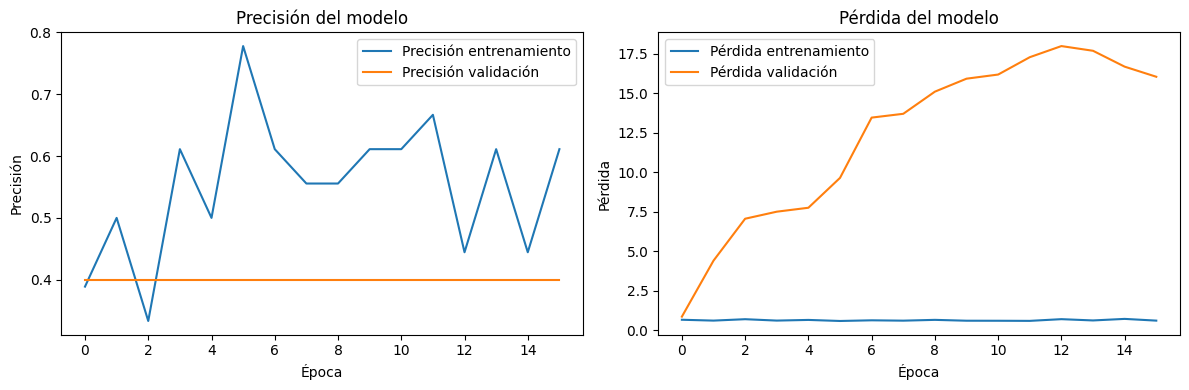

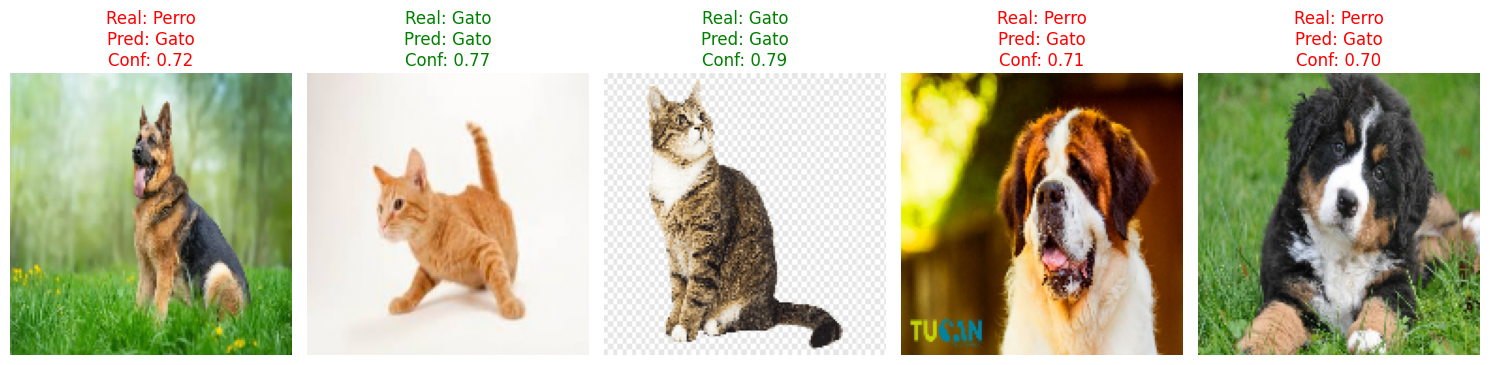

In [ ]:
# Celda 8: Evaluar y visualizar resultados
if 'modelo' in locals():
    # Evaluar el modelo
    if 'X_prueba' in locals() and X_prueba.shape[0] > 0:
        p√©rdida, precisi√≥n = modelo.evaluate(X_prueba, y_prueba, verbose=0)
        print(f"Precisi√≥n en datos de prueba: {precisi√≥n * 100:.2f}%")

        # Tambi√©n evaluar en entrenamiento para comparar
        p√©rdida_ent, precisi√≥n_ent = modelo.evaluate(X_entrenamiento, y_entrenamiento, verbose=0)
        print(f"Precisi√≥n en datos de entrenamiento: {precisi√≥n_ent * 100:.2f}%")

        # Calcular diferencia para detectar sobreajuste
        diferencia = abs(precisi√≥n_ent - precisi√≥n)
        if diferencia > 0.2:
            print("‚ö†Ô∏è  Posible sobreajuste detectado (diferencia > 20%)")
        elif diferencia > 0.1:
            print("‚ö†Ô∏è  Ligero sobreajuste detectado (diferencia > 10%)")
        else:
            print("‚úÖ Buen equilibrio entre entrenamiento y prueba")

    else:
        # Si no hay datos de prueba, evaluar con datos de entrenamiento
        p√©rdida, precisi√≥n = modelo.evaluate(X_entrenamiento, y_entrenamiento, verbose=0)
        print(f"Precisi√≥n en datos de entrenamiento: {precisi√≥n * 100:.2f}%")

    # Graficar precisi√≥n y p√©rdida
    plt.figure(figsize=(12, 4))

    if 'historial' in locals():
        plt.subplot(1, 2, 1)
        if 'accuracy' in historial.history:
            plt.plot(historial.history['accuracy'], label='Precisi√≥n entrenamiento')
        if 'val_accuracy' in historial.history:
            plt.plot(historial.history['val_accuracy'], label='Precisi√≥n validaci√≥n')
        plt.title('Precisi√≥n del modelo')
        plt.xlabel('√âpoca')
        plt.ylabel('Precisi√≥n')
        plt.legend()

        plt.subplot(1, 2, 2)
        if 'loss' in historial.history:
            plt.plot(historial.history['loss'], label='P√©rdida entrenamiento')
        if 'val_loss' in historial.history:
            plt.plot(historial.history['val_loss'], label='P√©rdida validaci√≥n')
        plt.title('P√©rdida del modelo')
        plt.xlabel('√âpoca')
        plt.ylabel('P√©rdida')
        plt.legend()

        plt.tight_layout()
        plt.show()

    # Probar con algunas im√°genes
    if 'X' in locals() and X.shape[0] > 0:
        plt.figure(figsize=(15, 5))
        num_ejemplos = min(5, X.shape[0])

        for i in range(num_ejemplos):
            plt.subplot(1, num_ejemplos, i + 1)
            img = X[i]
            predicci√≥n = modelo.predict(np.expand_dims(img, axis=0), verbose=0)[0][0]
            etiqueta_pred = "Perro" if predicci√≥n > 0.5 else "Gato"
            confianza = predicci√≥n if predicci√≥n > 0.5 else 1 - predicci√≥n
            etiqueta_real = "Perro" if y[i] == 1 else "Gato"

            plt.imshow(img)
            # Color verde si es correcto, rojo si es incorrecto
            color = 'green' if etiqueta_pred == etiqueta_real else 'red'
            plt.title(f'Real: {etiqueta_real}\nPred: {etiqueta_pred}\nConf: {confianza:.2f}', color=color)
            plt.axis('off')

        plt.tight_layout()
        plt.show()

In [ ]:
# Celda 9: Guardar y convertir el modelo
if 'modelo' in locals():
    # Guardar modelo en formato Keras
    modelo.save('modelo_perros_gatos.h5')
    print("Modelo guardado como 'modelo_perros_gatos.h5'")

    # Convertir a TensorFlow.js
    !mkdir -p modelo_tfjs
    !tensorflowjs_converter --input_format keras modelo_perros_gatos.h5 modelo_tfjs/
    print("Modelo convertido a TensorFlow.js")

    # Verificar archivos generados
    print("\nArchivos en modelo_tfjs:")
    !ls -la modelo_tfjs/
else:
    print("No hay modelo para guardar.")

Modelo guardado como 'modelo_perros_gatos.h5'
2025-08-21 04:19:12.677394: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1755749952.701977   54678 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1755749952.709331   54678 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1755749952.729026   54678 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1755749952.729068   54678 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1755749952.729072   54678 com

In [ ]:
# Celda 10: Descargar el modelo
from google.colab import files

if os.path.exists('modelo_tfjs'):
    # Comprimir la carpeta del modelo
    !zip -r modelo_tfjs.zip modelo_tfjs/

    # Descargar
    print("\nDescargando modelo...")
    files.download('modelo_tfjs.zip')
    print("¬°Modelo descargado! Ahora puedes usarlo en Visual Studio Code.")
else:
    print("No se encontr√≥ la carpeta del modelo para descargar.")

  adding: modelo_tfjs/ (stored 0%)
  adding: modelo_tfjs/group1-shard1of2.bin (deflated 8%)
  adding: modelo_tfjs/model.json (deflated 85%)
  adding: modelo_tfjs/group1-shard2of2.bin (deflated 8%)

Descargando modelo...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

¬°Modelo descargado! Ahora puedes usarlo en Visual Studio Code.
